In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
from matplotlib.ticker import FormatStrFormatter
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/nino44/dados/main/master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
df.shape

(27820, 12)

In [4]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [6]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
year,27820.0,2.001258e+03,8.469055e+00,1985.000,1995.000,2002.000,2008.000,2.016000e+03
suicides_no,27820.0,2.425744e+02,9.020479e+02,0.000,3.000,25.000,131.000,2.233800e+04
population,27820.0,1.844794e+06,3.911779e+06,278.000,97498.500,430150.000,1486143.250,4.380521e+07
suicides/100k pop,27820.0,1.281610e+01,1.896151e+01,0.000,0.920,5.990,16.620,2.249700e+02
HDI for year,8364.0,7.766011e-01,9.336671e-02,0.483,0.713,0.779,0.855,9.440000e-01
gdp_per_capita ($),27820.0,1.686646e+04,1.888758e+04,251.000,3447.000,9372.000,24874.000,1.263520e+05


In [7]:
pd.set_option('float_format', '{:f}'.format)


Transformar os dados para float

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,27820.000000,2001.258375,8.469055,1985.000000,1995.000000,2002.000000,2008.000000,2016.000000
suicides_no,27820.000000,242.574407,902.047917,0.000000,3.000000,25.000000,131.000000,22338.000000
population,27820.000000,1844793.617398,3911779.441756,278.000000,97498.500000,430150.000000,1486143.250000,43805214.000000
suicides/100k pop,27820.000000,12.816097,18.961511,0.000000,0.920000,5.990000,16.620000,224.970000
HDI for year,8364.000000,0.776601,0.093367,0.483000,0.713000,0.779000,0.855000,0.944000
gdp_per_capita ($),27820.000000,16866.464414,18887.576472,251.000000,3447.000000,9372.000000,24874.000000,126352.000000


In [9]:
df.rename(columns={" gdp_for_year ($) ":
                  "gdp_for_year", "gdp_per_capita ($)":
                  "gdp_per_capita"}, inplace=True)
df.head()


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.710000,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.190000,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.830000,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.590000,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.280000,Albania1987,NaN,"2,156,624,900",796,Boomers


Text(0, 0.5, 'Suicídios')

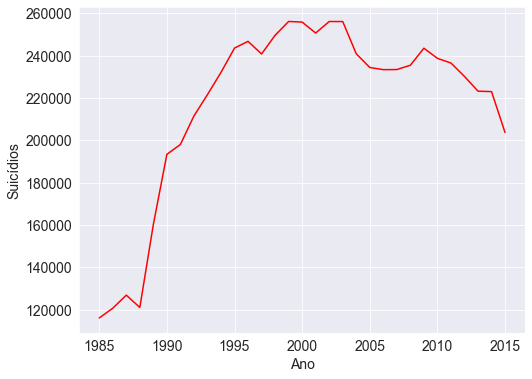

In [20]:
ns = df1['suicides_no'].groupby(df.year).sum()
ns.plot(figsize=(8,6), fontsize=14,color='red')
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Suicídios',fontsize=14)

In [31]:
df = df[df.year != 2016]

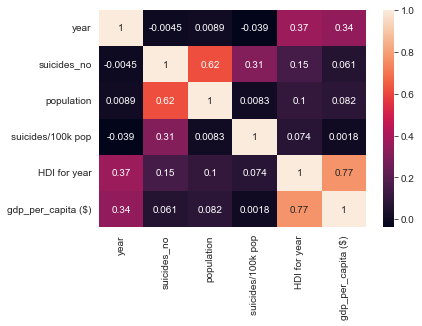

In [22]:
corr = sns.heatmap(df.corr(), annot=True)

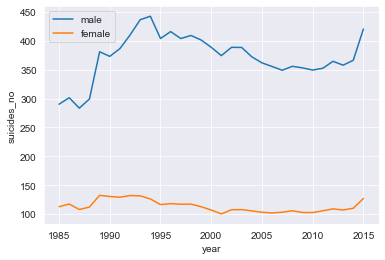

In [34]:
df_men = df[df.sex == "male"]
df_women = df[df.sex == "female"]
sns.lineplot(df_men.year, df.suicides_no, ci = None)
sns.lineplot(df_women.year, df.suicides_no, ci = None)
plt.legend(["male", 'female'])
plt.show()